<a href="https://colab.research.google.com/github/oscaredumurguia/Simulab/blob/main/Tarea_1_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea - Ajuste de curvas

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt

---
### Problema 1

Los siguientes datos representan el costo en dólares de la electricidad según Western Electricity Coordinating Council desde el 2014 (y su pronóstico para el 2040)

Tomado de:
https://www.quandl.com/data/EIA/AEO_2016_REF_NO_CPP_PRCE_NA_COMM_NA_ELC_NA_WECCRKS_NCNTPKWH_A-Electricity-End-Use-Prices-Commercial-Western-Electricity-Coordinating-Council-Rockies-No-CPP-AEO2016

In [ ]:
# Datos extraidos de la página de quandl
data = np.array([10.051101,  9.259127,  9.444813,  9.557723,  9.977324, 10.298326,
       10.447217, 10.550506, 10.590784, 10.657418, 10.743085, 10.831965,
       10.988435, 11.153055, 11.313326, 11.557165, 11.860136, 12.122511,
       12.356448, 12.611391, 12.814569, 13.111372, 13.357134, 13.559012,
       13.85861 , 14.135924, 14.436149])

1. Ajuste estos datos a polinomios de grado 1 hasta 3 (los datos en $x$ corresponden a los años de 2014 a 2040, sin embargo son valores muy grandes para elevarlos a una potencia, use una representación para estos años, por ejemplo $2014 \rightarrow 0$ y $2040\rightarrow 27$).

2. Muestre las tres curvas ajustadas junto a los datos de los costos en un solo gráfico

In [ ]:
años=np.arange(2014,2041)
x= años-2014
y= data

In [ ]:
def error1(beta,x,y):
  f = beta[0]+beta[1]*x
  return np.sum((y-f)**2)

In [ ]:
def error2(beta,x,y):
  f = beta[0]+beta[1]*x+beta[2]*x**2
  return np.sum((y-f)**2)

In [ ]:
def error3(beta,x,y):
  f = beta[0]+beta[1]*x+beta[2]*x**2+beta[3]*x**3
  return np.sum((y-f)**2)

---

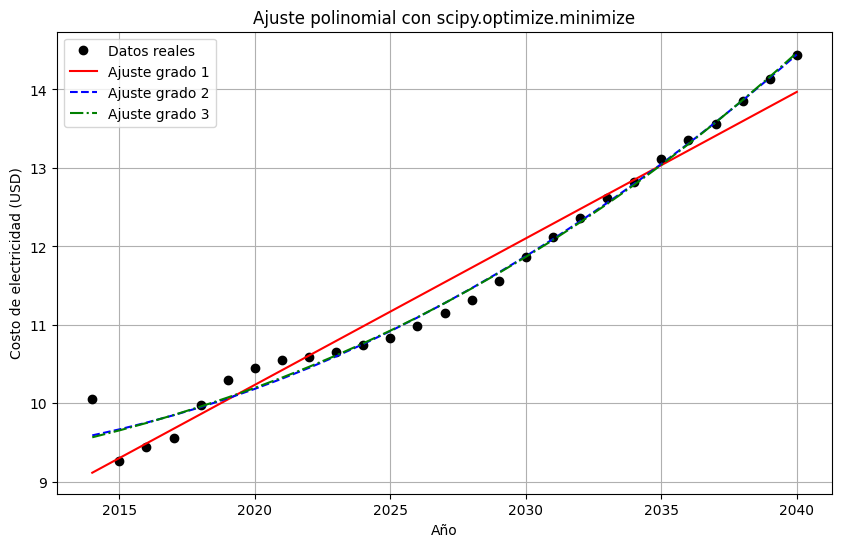

In [ ]:
b1_ini = np.random.rand(2)
b2_ini = np.random.rand(3)
b3_ini = np.random.rand(4)

sol1 = opt.minimize(error1, b1_ini, args=(x, y))
sol2 = opt.minimize(error2, b2_ini, args=(x, y))
sol3 = opt.minimize(error3, b3_ini, args=(x, y))

f1 = sol1.x[0] + sol1.x[1]*x
f2 = sol2.x[0] + sol2.x[1]*x + sol2.x[2]*x**2
f3 = sol3.x[0] + sol3.x[1]*x + sol3.x[2]*x**2 + sol3.x[3]*x**3

plt.figure(figsize=(10,6))
plt.plot(años, y, 'ko', label='Datos reales')
plt.plot(años, f1, 'r-', label='Ajuste grado 1')
plt.plot(años, f2, 'b--', label='Ajuste grado 2')
plt.plot(años, f3, 'g-.', label='Ajuste grado 3')
plt.xlabel('Año')
plt.ylabel('Costo de electricidad (USD)')
plt.title('Ajuste polinomial con scipy.optimize.minimize')
plt.grid(True)
plt.legend()
plt.show()

___
### Problema 2

El archivo `population_data.csv` contiene información histórica anual de México relativa a la población, nacimientos y muertes desde el año 1950 hasta el año 2015. La primer columna corresponde a los años, la segunda a la población, la tercera a los nacimientos y la última a los decesos.

Tomado de: https://en.wikipedia.org/wiki/Demographics_of_Mexico.

Importe estos datos usando la función `read_csv` del paquete `pandas`

1. Usando los años como variable independiente $x$ y la población como variable dependiente $y$, ajustar polinomios de grado 1 hasta grado 3.

    * Mostrar en un solo gráfico los datos de población contra los años, y los polinomios ajustados.

    * Graficar el error cuadrático acumulado contra el número de términos.

2. Repetir el punto 1 usando los nacimientos como variable dependiente $y$. Grafique las curvas ajustadas junto con los datos de nacimientos. Vea en un gráfico el error acumulado.

In [34]:
pd.read_csv('/content/drive/MyDrive/population_data.csv')

,Year,Poblacion,Nacimientos,Decesos
0,1950,28296,1174947,418430
1,1951,29110,1183788,458238
2,1952,29980,1195209,408823
3,1953,30904,1261775,446127
4,1954,31880,1339837,378752
...,...,...,...,...
61,2011,115683,2586287,590693
62,2012,117054,2498880,602354
63,2013,118395,2478889,623599
64,2014,119713,2463420,633641


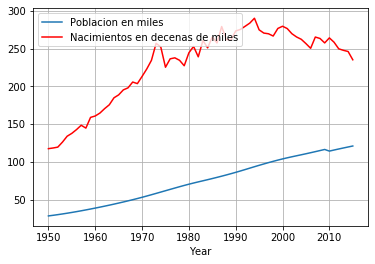

In [ ]:
# Se muestra la gráfica. Vea como los datos son escalados, esto le ayudará en el cálculo
# de la regresión.

plt.plot(data.values[:,0],data.values[:,1]/1000,label=data.columns[1]+' en miles')
plt.plot(data.values[:,0],data.values[:,2]/10000,'r',label=data.columns[2]+' en decenas de miles')
plt.legend(loc=2)
plt.xlabel(data.columns[0])
plt.grid()

---

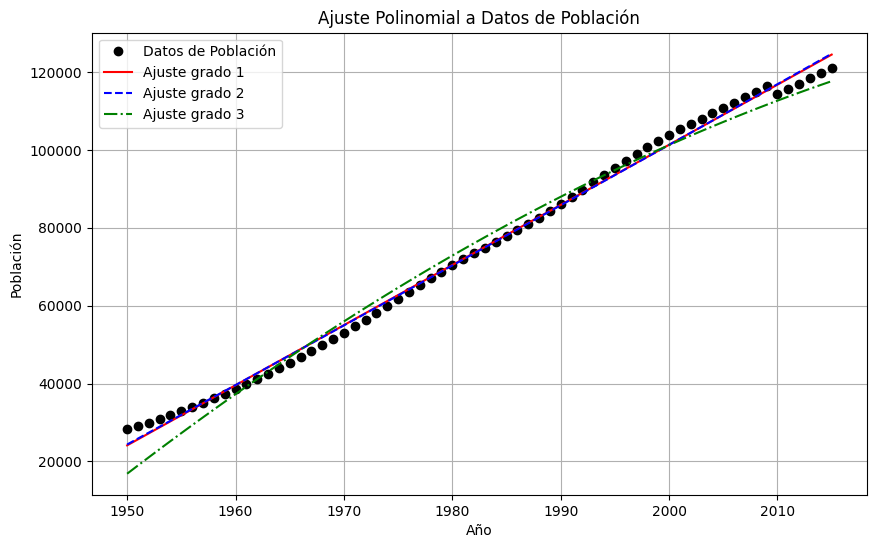

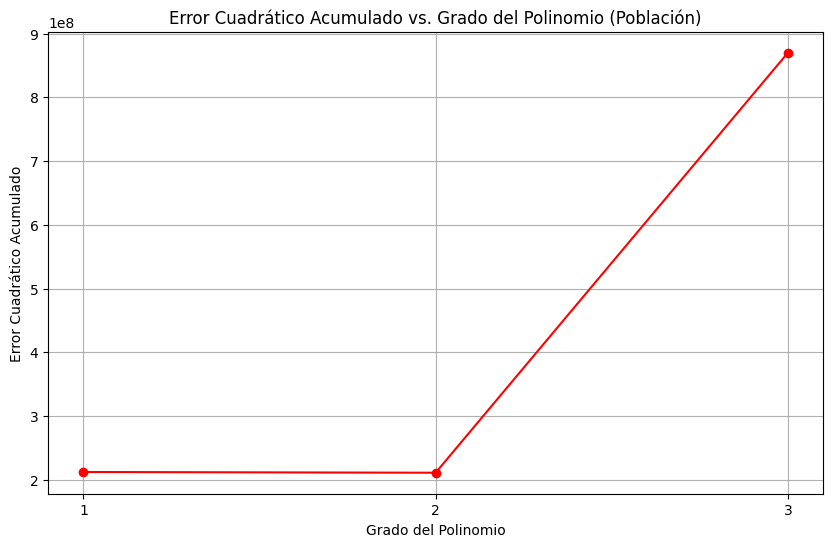

In [36]:
population_df = pd.read_csv('/content/drive/MyDrive/population_data.csv')

años_pob = population_df['Year']
poblacion = population_df['Poblacion']

def error_poly(beta, x, y, degree):
    f = np.polyval(beta, x)
    return np.sum((y - f)**2)

beta1_ini = np.random.rand(2)
beta2_ini = np.random.rand(3)
beta3_ini = np.random.rand(4)

sol_pob1 = opt.minimize(error_poly, beta1_ini, args=(años_pob, poblacion, 1))
sol_pob2 = opt.minimize(error_poly, beta2_ini, args=(años_pob, poblacion, 2))
sol_pob3 = opt.minimize(error_poly, beta3_ini, args=(años_pob, poblacion, 3))

f_pob1 = np.polyval(sol_pob1.x, años_pob)
f_pob2 = np.polyval(sol_pob2.x, años_pob)
f_pob3 = np.polyval(sol_pob3.x, años_pob)

plt.figure(figsize=(10, 6))
plt.plot(años_pob, poblacion, 'ko', label='Datos de Población')
plt.plot(años_pob, f_pob1, 'r-', label='Ajuste grado 1')
plt.plot(años_pob, f_pob2, 'b--', label='Ajuste grado 2')
plt.plot(años_pob, f_pob3, 'g-.', label='Ajuste grado 3')
plt.xlabel('Año')
plt.ylabel('Población')
plt.title('Ajuste Polinomial a Datos de Población')
plt.grid(True)
plt.legend()
plt.show()

errors = [sol_pob1.fun, sol_pob2.fun, sol_pob3.fun]
degrees = [1, 2, 3]

plt.figure(figsize=(10, 6))
plt.plot(degrees, errors, 'ro-')
plt.xlabel('Grado del Polinomio')
plt.ylabel('Error Cuadrático Acumulado')
plt.title('Error Cuadrático Acumulado vs. Grado del Polinomio (Población)')
plt.xticks(degrees)
plt.grid(True)
plt.show()